
<h1>Ecuaciones Diferenciales con diferencias Finitas de dos puntos by FCat[2019]</h1>

    - Reinicie el kernel o corra cada celda hasta el final


In [1]:
from sympy import var
from sympy import sympify
import math
import numpy as np
import matplotlib.pyplot as mp

x = var('x')  
xi = []

# Valida y retorna el valor de la expresión ingresada
def func(user_input,index):
    try:
        expr = sympify(user_input)
        return expr.subs(x, xi[index])
    except:
        print("[!] Expresión '%s' es inválida."%user_input)
        return -1

def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


In [2]:
# Definición de diferencias finitas

# Función f (i: index, m: coeficiente de la f)
def f(i,m):
    A[i][i] = A[i][i] + m
    
# Función de la primera derivada df
# i: index, h: tamaño paso, m: coeficiente de la función f'
def df(i,h,m):
    A[i][i-1] = A[i][i-1] - m/(2*h)
    try:
        A[i][i+1] = A[i][i+1] + m/(2*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(2*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(2*h)
        
# Función de la segunda derivada df
# i: index, h: tamaño paso, m: coeficiente de la función f''
def d2f(i,h,m):
    A[i][i-1] = A[i][i-1] + m/(h*h)
    A[i][i]   = A[i][i] - 2*m/(h*h)
    try:
        A[i][i+1] = A[i][i+1] + m/(h*h)
    except:
        pass
    if(i == 0):
        b[i] = b[i] - m*x0/(h*h)
    if((i+1)== dim):
        b[i] = b[i] - m*x1/(h*h)
        

Ecuaciones Diferenciales con diferencias finitas de dos puntos by FCat [2019]
- Ingrese los cuadrados como x*x
- No olvide poner '*' entre los números y variables, ej: 2*x, -4*cos(3*x),etc 

tamaño paso h: 0.2
Coeficiente de la segunda derivada: 1
Coeficiente de la primera derivada: 0
Coeficiente de la función: -x
Coeficiente libre: 1
x(0): 0
x(1): 1
----------------------------------
Ecuación: (1)f'' + (0)f' + (-x)f = 1
x0 = 0.00 x1 =1.00 h =0.20
xi = [0.2, 0.4, 0.6, 0.8]
Resultado Matriz:
[[-50.2  25.    0.    0. ]
 [ 25.  -50.4  25.    0. ]
 [  0.   25.  -50.6  25. ]
 [  0.    0.   25.  -50.8]]
Resultado Coeficientes:
[1.0, 1.0, 1.0, -24.0]
Soluciones
[0.108, 0.257, 0.45, 0.694]


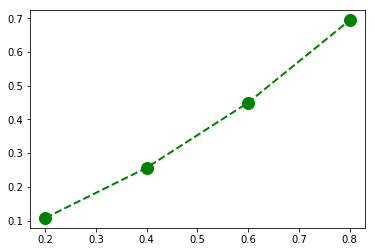

In [3]:
#coeficientes de la ecuación
print("Ecuaciones Diferenciales con diferencias finitas de dos puntos by FCat [2019]")
print("- Ingrese los cuadrados como x*x")
print("- No olvide poner '*' entre los números y variables, ej: 2*x, -4*cos(3*x),etc \n")


hinput = input("tamaño paso h: ")
while(isfloat(hinput)==False or float(hinput)<=0):
    print("El tamaño de paso debe ser mayor a cero")
    hinput = input("tamaño paso h: ")
h = float(hinput)
#valores xi del intervalo entre x(0) y x(1) con paso h
xi = [x/10 for x in range(int(h*10),10,int(h*10))]

cd2f = input("Coeficiente de la segunda derivada: ")
while(func(cd2f,1)==-1):
    cd2f = input("Coeficiente de la segunda derivada: ")
cdf = input("Coeficiente de la primera derivada: ")
while(func(cdf,1)==-1):
    cdf = input("Coeficiente de la primera derivada: ")
cf = input("Coeficiente de la función: ")
while(func(cf,1)==-1):
    cf = input("Coeficiente de la función: ")
c  = input("Coeficiente libre: ")
while(func(c,1)==-1):
    c = input("Coeficiente libre: ")

inputx = input("x(0): ")
while(isfloat(inputx)==False):
    inputx = input("x(0): ")
x0 = float(inputx)
inputx = input("x(1): ")
while(isfloat(inputx)==False):
    inputx = input("x(1): ")
x1 = float(inputx)

dim = len(xi)
A = np.zeros((dim,dim))
b = np.zeros((dim))


#generación de sistema
for i in range(dim):
    b[i] = func(c,i)
    d2f(i,h,func(cd2f,i))
    df(i,h,func(cdf,i))
    f(i,func(cf,i))
    
    
A[0][dim-1] = 0.0 #ajuste ><
    
#redondear

for i in range(dim):
    for j in range(dim):
        A[i][j] = round(A[i][j],3)
        
b = [round(x,3) for x in b]

#solucion sistema
solve = np.linalg.solve(A,b)
solve =[round(x,3) for x in solve]

#output
print("----------------------------------")
print("Ecuación: (%s)f'' + (%s)f' + (%s)f = %s"%(cd2f,cdf,cf,c))
print("x0 = %2.2f x1 =%2.2f h =%2.2f"%(x0,x1,h))
print("xi = "+ str(xi))
print("Resultado Matriz:")
print(A)
print("Resultado Coeficientes:")
print(b)
print("Soluciones")
print(solve)
mp.plot(xi,solve,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)